In [2]:
from google.colab import files
uploaded = files.upload()

Saving laptop_price[1].csv to laptop_price[1].csv


In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
df = pd.read_csv("laptop_price[1].csv",  encoding='ISO-8859-1')
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [59]:
def plot_scatter(x, y, xlabel, ylabel, title, subtitle, title_position, subtitle_position, size, alpha, prediction="None"):
    plt.figure(figsize=(10,10))
    xx = sns.scatterplot(data = df, y = y, x = x,
                 linewidth = 1,  s = size, alpha = alpha, marker = "o", edgecolor = "black")
    xx.text(x = title_position, y = 1.07, s = title, fontsize = 22.5, weight = 'bold', ha = 'center', va = 'bottom', transform = xx.transAxes)
    xx.text(x = subtitle_position, y = 1.03, s = subtitle, fontsize = 16.5, alpha = 0.75, ha = 'center', va = 'bottom', transform = xx.transAxes)
    if (prediction != "None"):
      plt.plot(X, prediction, color='blue', linewidth=2)


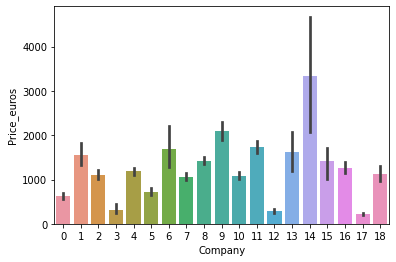

In [56]:
sns.barplot(x=df['Company'],y=df['Price_euros'])
plt.show()

In [20]:
df.drop(columns = 'laptop_ID', inplace = True)
print(df.info())
df.dtypes

KeyError: ignored

In [21]:
df['Weight']=df['Weight'].str.replace('kg','')
df["Weight"]=df["Weight"].str.extract('(\d*\.?\d*)', expand=False).astype(float)
pd.to_numeric(df['Weight'], errors='coerce')

AttributeError: ignored

In [61]:
from numpy.core.records import array
ar = []
for i in df.columns:
  if i!="Product" and i!="Inches" and i!="Price_euros" and i!="Weight": ar.append(i)
ar

['Company',
 'TypeName',
 'ScreenResolution',
 'Cpu',
 'Ram',
 'Memory',
 'Gpu',
 'OpSys']

In [62]:
df.isnull().sum()

Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [63]:
objectslabel = {}
for i in ar:
  encode=preprocessing.LabelEncoder()
  encode.fit(df[i])
  df[i]=encode.transform(df[i])
  objectslabel[i] = encode
print(df.head())
df.dtypes

   Company      Product  TypeName  Inches  ...  Gpu  OpSys  Weight  Price_euros
0        1  MacBook Pro         4    13.3  ...   58      8    1.37      1339.69
1        1  Macbook Air         4    13.3  ...   51      8    1.34       898.94
2        7       250 G6         3    15.6  ...   53      4    1.86       575.00
3        1  MacBook Pro         4    15.4  ...    9      8    1.83      2537.45
4        1  MacBook Pro         4    13.3  ...   59      8    1.37      1803.60

[5 rows x 12 columns]


Company               int64
Product              object
TypeName              int64
Inches              float64
ScreenResolution      int64
Cpu                   int64
Ram                   int64
Memory                int64
Gpu                   int64
OpSys                 int64
Weight              float64
Price_euros         float64
dtype: object

In [64]:
ar.append("Weight")
ar.append("Inches")
X=df[ar].values
Y=df['Price_euros'].values
features = pd.Series(ar)
features#регрессия

0             Company
1            TypeName
2    ScreenResolution
3                 Cpu
4                 Ram
5              Memory
6                 Gpu
7               OpSys
8              Weight
9              Inches
dtype: object

In [26]:
slr = LinearRegression()#модель линейной регрессии
slr.fit(X,Y)# применение линейной регрессии к нашему набору данных 
cdf = pd.DataFrame(slr.coef_, columns=['Coefficient'])# сохранение коэффициентов для каждого признака
cdf['features'] = features
print(slr.intercept_)
cdf

67.65902494116358


,Coefficient,features
0,15.392332,Company
1,35.484244,TypeName
2,17.368249,ScreenResolution
3,9.780060,Cpu
4,-38.199544,Ram
5,12.576209,Memory
6,4.927200,Gpu
7,134.610183,OpSys
8,335.268722,Weight
9,-108.877604,Inches


In [31]:
y_true = Y
y_pred = slr.predict(X)
mean_squared_error(y_true, y_pred)

245837.7012297206

In [33]:
s = ""
for i in range(1, 10):
  print("(", cdf['Coefficient'].iloc[i], "*", cdf['features'].iloc[i], ")", end = "+", sep = " ")#уравнение регрессии

( 35.48424443700039 * TypeName )+( 17.36824885917187 * ScreenResolution )+( 9.780059999405234 * Cpu )+( -38.1995442751531 * Ram )+( 12.57620915163044 * Memory )+( 4.927200339941893 * Gpu )+( 134.61018341185255 * OpSys )+( 335.26872204097975 * Weight )+( -108.8776042439722 * Inches )+

In [34]:
X = df[['Weight']].values
y = df['Price_euros'].values
slr = LinearRegression()# создание модели линейной регрессии
slr.fit(X, y)
y_pred = slr.predict(X)
print('Slope: ', slr.coef_) # k
print('Intercept:', slr.intercept_) # b

Slope:  [220.9707054]
Intercept: 673.1865696387358


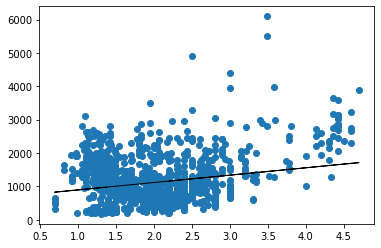

In [37]:
import matplotlib.pyplot as plt
plt.scatter(X, y)
plt.plot(X, slr.predict(X), color='black', linewidth=1)

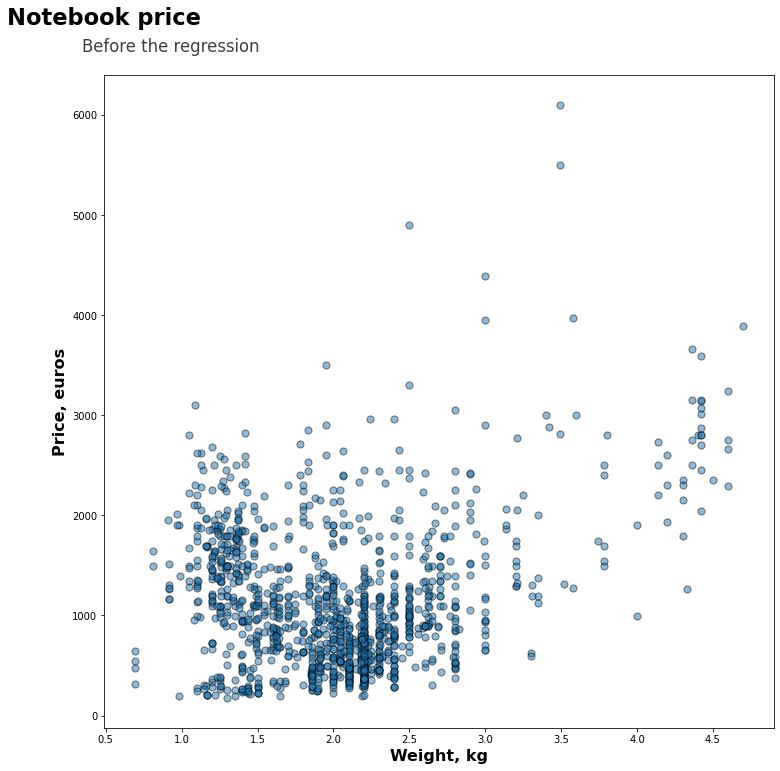

In [52]:
plot_scatter(x = "Weight", y = "Price_euros", ylabel = 'Price, euros', xlabel = "Weight, kg", title = "Notebook price",subtitle = "Before regression", title_position = 0, subtitle_position = 0.1,  size = 50, alpha = 0.5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  # Remove the CWD from sys.path while we load stuff.


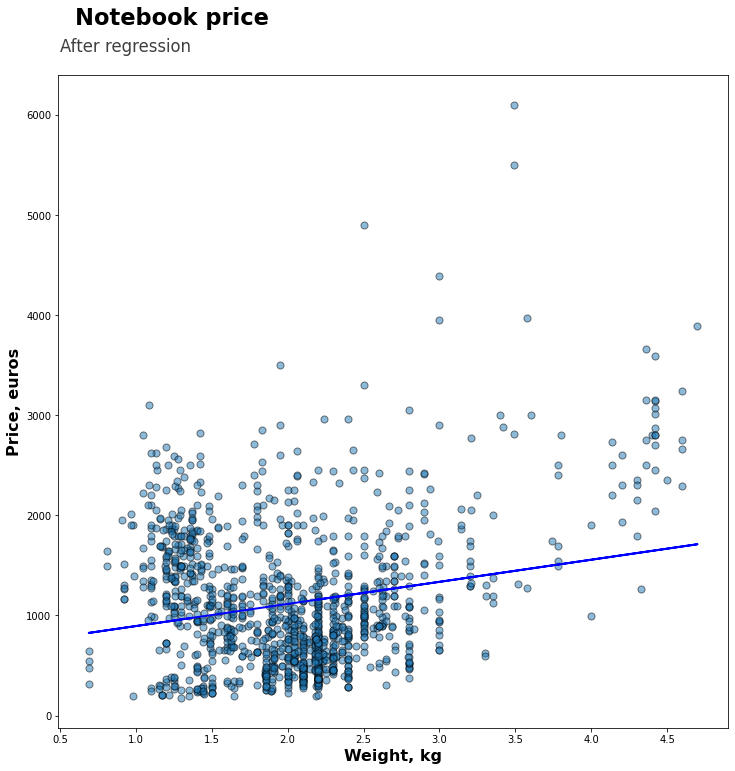

In [54]:
plot_scatter(x = "Weight", y = "Price_euros", ylabel = 'Price, euros', xlabel = "Weight, kg", title = "Notebook price", subtitle = "After regression", title_position = 0.17, subtitle_position = 0.1,  size = 50, alpha = 0.5,  prediction = slr.predict(X))